In [2]:
#using Pkg
#Pkg.add(PackageSpec(name="JWAS",rev="master"))
#Pkg.add("RecipesBase")
#using RecipesBase

In [3]:
# make plot work
#ENV["GRDIR"]=""
#Pkg.build("GR")

In [4]:
#methods(add_genotypes)

In [1]:
using DataFrames              # package for working with data sets
using JWAS                    # package for Bayesian regression analyses, including BayesB and BayesCπ        
#using JWAS:misc               # utility functions
using JWAS.Datasets
using Distributions       
using Plots                   # package for plotting 
using CSV
using LinearAlgebra,Statistics,Random,DelimitedFiles, DataFrames

In [2]:
phenotypes = CSV.read("/home/jovyan/mark/JWAS_CDPQ/CDPQ_all_data/production_1_7_Exp_0.75_Complete_Adj.dat", types=Dict(:ID => String), delim = ' ',header=true, missingstrings=["NA"] )
first(phenotypes,10)

,ID,Cycle,BatchNum,Batch,Company,SowID,NurEnrich,QNurPenBatch,NurPenBatch
,String,Int64,Int64,String,String,String,Bool,String,String?
1,0001,1,1,1B,A,1B_1715,false,1B_D04,1B_D04
2,0002,1,1,1B,A,1B_1642,false,1B_D04,1B_D04
3,0004,1,1,1B,A,1B_2150,false,1B_D04,1B_D04
4,0005,1,1,1B,A,1B_1980,false,1B_D04,1B_D04
5,0006,1,1,1B,A,1B_1902,false,1B_D04,1B_D04
6,0007,1,1,1B,A,1B_2150,false,1B_D04,1B_D04
7,0009,1,1,1B,A,1B_1902,false,1B_D02,1B_D02
8,0010,1,1,1B,A,1B_1885,false,1B_D02,1B_D02
9,0011,1,1,1B,A,1B_2097,false,1B_D02,1B_D02


In [3]:
phenotypes= dropmissing(phenotypes, :NurPenBatch)
#phenotypes= dropmissing(phenotypes, :Died)

,ID,Cycle,BatchNum,Batch,Company,SowID,NurEnrich,QNurPenBatch,NurPenBatch
,String,Int64,Int64,String,String,String,Bool,String,String
1,0001,1,1,1B,A,1B_1715,false,1B_D04,1B_D04
2,0002,1,1,1B,A,1B_1642,false,1B_D04,1B_D04
3,0004,1,1,1B,A,1B_2150,false,1B_D04,1B_D04
4,0005,1,1,1B,A,1B_1980,false,1B_D04,1B_D04
5,0006,1,1,1B,A,1B_1902,false,1B_D04,1B_D04
6,0007,1,1,1B,A,1B_2150,false,1B_D04,1B_D04
7,0009,1,1,1B,A,1B_1902,false,1B_D02,1B_D02
8,0010,1,1,1B,A,1B_1885,false,1B_D02,1B_D02
9,0011,1,1,1B,A,1B_2097,false,1B_D02,1B_D02


In [4]:
Died_model_equations = "Died_Adj = intercept + Batch + EntryAge + NurPenBatch"
Died_R=1.00000
Died_model=build_model(Died_model_equations,Died_R);

In [5]:
set_covariate(Died_model,"EntryAge")

1-element Array{Symbol,1}:
 :EntryAge

In [6]:
Died_G1=0.277714E-01
set_random(Died_model,"NurPenBatch",Died_G1)

In [2]:
function readMatBin(fileName)
    genStr = open(fileName)
    n = read(genStr,Int64)
    p = read(genStr,Int64)
    M = zeros(n,p)
    for j in 1:p
        for i in 1:n
            M[i,j] = read(genStr,Float64)
        end
    end
    close(genStr)
    return M
end
@time M = readMatBin("/home/jovyan/mark/JWAS_CDPQ/CDPQ_all_data/ALGP2_Cycle_1_7_Geno_Complete_Impute_JWAS.bin.gen.bin")

 27.547650 seconds (37.77 k allocations: 10.393 GiB, 0.07% gc time)


3205×435172 Array{Float64,2}:
 0.0  2.0  0.0  2.0  2.0  0.0  2.0  2.0  …  0.0  2.0  0.0  2.0  2.0  2.0  2.0
 1.0  2.0  0.0  2.0  2.0  0.0  1.0  2.0     0.0  2.0  1.0  2.0  2.0  2.0  2.0
 0.0  2.0  0.0  1.0  2.0  0.0  1.0  2.0     0.0  2.0  0.0  2.0  2.0  2.0  2.0
 1.0  2.0  0.0  1.0  2.0  0.0  1.0  2.0     0.0  2.0  1.0  2.0  2.0  2.0  2.0
 0.0  2.0  0.0  2.0  2.0  0.0  2.0  2.0     0.0  2.0  0.0  2.0  2.0  2.0  2.0
 1.0  1.0  1.0  0.0  1.0  1.0  0.0  1.0  …  0.0  2.0  0.0  2.0  2.0  2.0  2.0
 0.0  2.0  0.0  1.0  2.0  0.0  1.0  2.0     0.0  2.0  0.0  2.0  2.0  2.0  2.0
 0.0  2.0  0.0  0.0  2.0  0.0  0.0  2.0     0.0  2.0  0.0  2.0  2.0  2.0  2.0
 1.0  2.0  0.0  0.0  2.0  0.0  0.0  2.0     0.0  2.0  0.0  2.0  2.0  2.0  2.0
 0.0  2.0  0.0  2.0  2.0  0.0  2.0  2.0     0.0  2.0  1.0  2.0  2.0  2.0  2.0
 1.0  1.0  0.0  1.0  2.0  0.0  0.0  2.0  …  0.0  2.0  0.0  2.0  2.0  2.0  2.0
 0.0  2.0  0.0  0.0  2.0  0.0  0.0  2.0     0.0  2.0  0.0  2.0  2.0  2.0  2.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0

In [8]:
rowID = vec(readdlm("/home/jovyan/mark/JWAS_CDPQ/CDPQ_all_data/ALGP2_Cycle_1_7_Geno_Complete_Impute_JWAS.bin.ids.txt",String))

3205-element Array{String,1}:
 "0001"
 "0002"
 "0004"
 "0005"
 "0006"
 "0007"
 "0009"
 "0010"
 "0011"
 "0012"
 "0013"
 "0014"
 "0015"
 ⋮     
 "3283"
 "3284"
 "3285"
 "3286"
 "3287"
 "3288"
 "3289"
 "3290"
 "3291"
 "3292"
 "3293"
 "3294"

In [9]:
Died_G3=0.909307E-01
@time add_genotypes(Died_model,M,Died_G3,header=false, rowID=rowID)
#@time add_genotypes(Nur2ADG_model,"Geno_JWAS_impute.txt",Nur2ADG_G3,separator=' ')

The marker IDs are set to 1,2,...,#markers
#markers: 435172; #individuals: 3205
 14.574227 seconds (8.06 M allocations: 15.986 GiB, 1.45% gc time)


4.0f0

In [10]:
@time Died_outB=runMCMC(Died_model,phenotypes,methods="BayesB", missing_phenotypes=true, Pi= 0.999, estimatePi=true, estimateScale=true, chain_length=50000,burnin = 5000,output_heritability=true,  output_samples_frequency=100)

The folder results is created to save results.
Checking phenotypes...
Individual IDs (strings) are provided in the first column of the phenotypic data.
The number of observations with both genotypes and phenotypes used in the analysis is 3181.

The prior for marker effects variance is calculated from the genetic variance and π.
The mean of the prior for the marker effects variance is: 0.000546



A Linear Mixed Model was build using model equations:

Died_Adj = intercept + Batch + EntryAge + NurPenBatch

Model Information:

Term            C/F          F/R            nLevels
intercept       factor       fixed                1
Batch           factor       fixed               50
EntryAge        covariate    fixed                1
NurPenBatch     factor       random             436

MCMC Information:

chain_length                                  50000
burnin                                         5000
starting_value                                 true
printout_frequency                

running MCMC ...100%|███████████████████████████████████| Time: 6:34:52




The version of Julia and Platform in use:

Julia Version 1.1.0
Commit 80516ca202 (2019-01-21 21:24 UTC)
Platform Info:
  OS: Linux (x86_64-pc-linux-gnu)
  CPU: Intel(R) Core(TM) i7-5960X CPU @ 3.00GHz
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-6.0.1 (ORCJIT, haswell)
Environment:
  JULIA_DEPOT_PATH = /opt/julia
  JULIA_PKGDIR = /opt/julia
  JULIA_VERSION = 1.1.0


The analysis has finished. Results are saved in the returned variable and text files. MCMC samples are saved in text files.


23731.752854 seconds (90.18 G allocations: 1.776 TiB, 1.05% gc time)


Dict{Any,Any} with 8 entries:
  "ScaleEffectVargeno"  => 1×3 DataFrame…
  "heritability"        => 1×3 DataFrame…
  "location parameters" => 488×5 DataFrame…
  "residual variance"   => 1×3 DataFrame…
  "marker effects geno" => 435172×5 DataFrame…
  "EBV_Died_Adj"        => 3205×3 DataFrame…
  "genetic_variance"    => 1×3 DataFrame…
  "pi_geno"             => 1×3 DataFrame…

In [11]:
h2=CSV.read("MCMC_samples_heritability.txt",delim = ' ',header=true)
insertcols!(h2, 1, :iteration => 1:450) # Add a column called iteration

,iteration,Died
,Int64,Float64
1,1,0.0785241
2,2,0.0826021
3,3,0.0922568
4,4,0.0812819
5,5,0.0863117
6,6,0.090341
7,7,0.0985591
8,8,0.102101
9,9,0.0952378


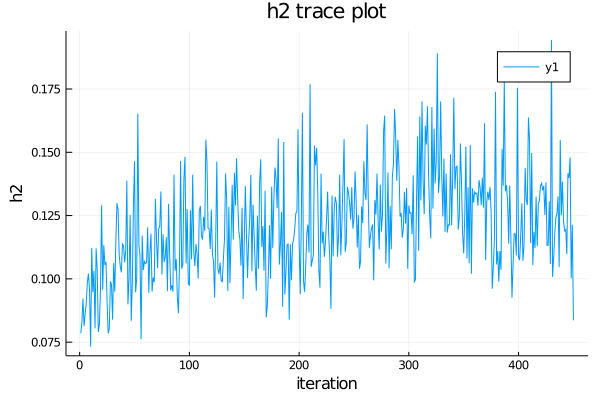

In [12]:
using Plots
x = h2[!,1]; y = h2[!,2]; # These are the plotting data
plot(x,y, title = "h2 trace plot",
        xlabel = "iteration", ylabel = "h2")

In [4]:
@time Died_outB = GWAS("results/MCMC_samples_marker_effects_geno_Died_Adj.txt",
    "/home/jovyan/mark/JWAS_CDPQ/CDPQ_all_data/ChrInfo_map_1_7_Complete_JWAS.txt",
    M;header=true,window_size="1 Mb",threshold=0.001)

Compute the posterior probability of association of the genomic window that explains more than 0.001 of the total genetic variance.


running GWAS...100%|████████████████████████████████████| Time: 0:20:18


1274.766829 seconds (606.06 M allocations: 4.613 TiB, 24.89% gc time)


(2395×13 DataFrame. Omitted printing of 7 columns
│ Row  │ trait │ window │ chr    │ wStart    │ wEnd      │ start_SNP │
│      │ Int64 │ Int64  │ String │ Int64     │ Int64     │ Int64     │
├──────┼───────┼────────┼────────┼───────────┼───────────┼───────────┤
│ 1    │ 1     │ 8      │ 1      │ 7000000   │ 8000000   │ 7002079   │
│ 2    │ 1     │ 2168   │ 17     │ 15000000  │ 16000000  │ 15060479  │
│ 3    │ 1     │ 408    │ 2      │ 132000000 │ 133000000 │ 132004620 │
│ 4    │ 1     │ 1526   │ 12     │ 7000000   │ 8000000   │ 7006069   │
│ 5    │ 1     │ 1254   │ 9      │ 25000000  │ 26000000  │ 25000259  │
│ 6    │ 1     │ 1512   │ 11     │ 73000000  │ 74000000  │ 73004835  │
│ 7    │ 1     │ 150    │ 1      │ 149000000 │ 150000000 │ 149002313 │
│ 8    │ 1     │ 1609   │ 13     │ 28000000  │ 29000000  │ 28001643  │
│ 9    │ 1     │ 837    │ 6      │ 40000000  │ 41000000  │ 40000532  │
│ 10   │ 1     │ 1086   │ 7      │ 118000000 │ 119000000 │ 118002343 │
⋮
│ 2385 │ 1     │ 2384   │

In [4]:
sort(Died_outB, :prGenVar, rev=true)

,trait,window,chr,wStart,wEnd,start_SNP,end_SNP,numSNP,estimateGenVar
,Int64,Int64,String,Int64,Int64,Int64,Int64,Int64,Float64
1,1,8,1,7000000,8000000,7002079,7994976,224,0.000595689
2,1,2168,17,15000000,16000000,15060479,15995802,219,0.000163069
3,1,1526,12,7000000,8000000,7006069,7982108,270,0.000104149
4,1,408,2,132000000,133000000,132004620,132982619,246,0.000106574
5,1,1254,9,25000000,26000000,25000259,25998536,304,7.87632e-5
6,1,1512,11,73000000,74000000,73004835,73993401,240,7.45333e-5
7,1,1086,7,118000000,119000000,118002343,118995300,218,7.05582e-5
8,1,150,1,149000000,150000000,149002313,149993355,176,4.90459e-5
9,1,1731,13,150000000,151000000,150107858,150888759,159,4.18546e-5


In [6]:
CSV.write("MCMC_samples_1Mb_window_VarProps_Died_Adj.txt", Died_outB[1])

"MCMC_samples_1Mb_window_VarProps_Died_Adj.txt"

In [38]:
#marker_effects = GWAS("MCMC_samples_marker_effects_FinADG.txt";header=true) # probability of inclusion

In [39]:
#Nur2_ADG_outBPi = GWAS("MCMC_samples_marker_effects_Nur2ADG.txt",Nur2ADG_model;header=true,window_size=20,threshold=0.001,output_winVarProps=false)  # No map

In [40]:
#using DelimitedFiles
#VL_winVarProps=readdlm("JWAS-WG/Haplotype/MCMC_samples_1MbwindowVarProps_Haplotype_WG-BayesB.txt", '\t',header=false)

In [41]:
#res = VL_winVarProps .> 2/2400
#ppa = sum(res,dims=1)./450

In [42]:
#ppa[1, [261 755 1352 2185]]

In [43]:
#sort(vec(ppa))